In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LSTM(Long Short Term Memory)

<img src="https://drive.google.com/uc?id=1aMMLM0dp4O5KOBZHRgTOLGOQHxQvffuL">

In [2]:
from tensorflow.keras.datasets import reuters
import numpy as np

In [3]:
# 많이 나온 단어 상위 1000개만 출력
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
word_index = reuters.get_word_index()
index_to_word={}
for key, value in word_index.items():
  index_to_word[value] = key

550378/550378 [==============================] - 0s 0us/step


In [5]:
index_to_word[1]  # 인덱스는 1번부터

'the'

In [6]:
# 46가지로 뉴스를 분류
np.max(y_train)

45

In [7]:
# 뉴스마다 길이가 다름
len(X_train[3]), len(X_train[4]), len(X_train[5])

(224, 101, 116)

In [8]:
# 가장 긴 뉴스 길이
print(max(len(i) for i in X_train))

2376


In [9]:
# 뉴스의 평균 길이
print(sum(map(len, X_train))/len(X_train))

145.5398574927633


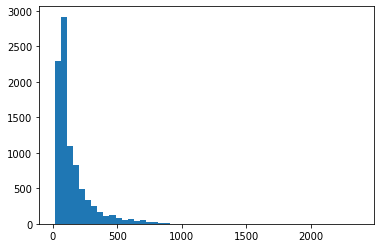

In [10]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in X_train], bins=50)
plt.show()

- 길이가 긴 데이터는 자르고
- 길이가 짧은 데이터는 일정 길이로 맞춤(앞에 공백을 의미하는 0을 추가)

In [11]:
# 한 뉴스의 단어수를 145로 맞춰줌
from tensorflow.keras.preprocessing import sequence

In [12]:
X_train = sequence.pad_sequences(X_train, maxlen=145)
X_test = sequence.pad_sequences(X_test, maxlen=145)

In [13]:
X_train.shape, X_test.shape

((8982, 145), (2246, 145))

In [14]:
# y 데이터 원핫인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train.shape

(8982, 46)

# 워드 임베딩(Word Embeding)
- 자연어를 컴퓨터가 이해하고, 효율적으로 처리하기 위해서는 컴퓨터가 이해할 수 있도록 변환 할 필요가 있다.
- 단어의 의미를 벡터화 하는 것을 워드 임베딩이라 한다.
- 주로 희소 표현(one-hot-encoding)에서 밀집 표현으로 변환하는 것을 말한다.

  - 희소 표현 : 사과=1,버스=2,페라리=3,딸기=4
  - 밀집 표현 : 앞쪽은 자동차 뒤쪽은 빨간 먹는거...

  <img src="https://drive.google.com/uc?id=1j_ULgtZcEbMeNw-CV3g9lVq1nuOjwViv">

In [16]:
# LSTM 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [17]:
model1 = Sequential()

# 단어를 희소표현에서 밀집표현으로 변경 = 워드 임베딩
model1.add(Embedding(1000, 145))  #  사용된 단어의 갯수(1000), 기사당 단어 수(145)
model1.add(LSTM(100, activation='tanh'))
model1.add(Dense(46, activation='softmax'))

In [18]:
model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [19]:
h1 = model1.fit(X_train, y_train, epochs=50)

Epoch 1/50
281/281 [==============================] - 11s 10ms/step - loss: 2.2421 - accuracy: 0.4434
Epoch 2/50
281/281 [==============================] - 3s 10ms/step - loss: 1.8481 - accuracy: 0.5233
Epoch 3/50
281/281 [==============================] - 3s 9ms/step - loss: 1.7236 - accuracy: 0.5567
Epoch 4/50
281/281 [==============================] - 3s 9ms/step - loss: 1.5780 - accuracy: 0.6041
Epoch 5/50
281/281 [==============================] - 3s 9ms/step - loss: 1.4519 - accuracy: 0.6317
Epoch 6/50
281/281 [==============================] - 3s 9ms/step - loss: 1.3493 - accuracy: 0.6647
Epoch 7/50
281/281 [==============================] - 3s 9ms/step - loss: 1.2645 - accuracy: 0.6847
Epoch 8/50
281/281 [==============================] - 3s 10ms/step - loss: 1.1583 - accuracy: 0.7099
Epoch 9/50
281/281 [==============================] - 3s 12ms/step - loss: 1.0737 - accuracy: 0.7338
Epoch 10/50
281/281 [==============================] - 3s 9ms/step - loss: 0.9933 - accuracy: 0

### LSTM

Epoch 20/50
281/281 [==============================] - 3s 9ms/step - loss: 0.4802 - accuracy: 0.8796

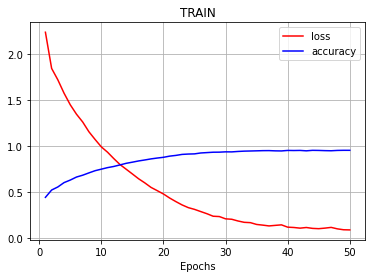

In [23]:
# 시각화
import matplotlib.pyplot as plt

loss1 = h1.history["loss"]
acc1 = h1.history["accuracy"]

xaxis= range(1, 51)

plt.plot(xaxis, loss1, "r", label="loss")
plt.plot(xaxis, acc1, "b", label="accuracy")
plt.legend()
plt.grid()
plt.title("TRAIN")
plt.xlabel("Epochs")
plt.show()

In [34]:
# LSTM 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [35]:
model2 = Sequential()

# 단어를 희소표현에서 밀집표현으로 변경 = 워드 임베딩
model2.add(Embedding(1000, 145))  #  사용된 단어의 갯수(1000), 기사당 단어 수(145)
model2.add(SimpleRNN(100, input_shape=(1000, 145), activation='tanh'))
model2.add(Dense(46, activation='softmax'))

In [36]:
model2.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [37]:
h2 = model2.fit(X_train, y_train, epochs=50)

Epoch 1/50
281/281 [==============================] - 39s 134ms/step - loss: 2.4478 - accuracy: 0.3688
Epoch 2/50
281/281 [==============================] - 36s 128ms/step - loss: 2.2204 - accuracy: 0.4231
Epoch 3/50
281/281 [==============================] - 36s 128ms/step - loss: 2.0674 - accuracy: 0.4713
Epoch 4/50
281/281 [==============================] - 36s 126ms/step - loss: 1.9883 - accuracy: 0.4904
Epoch 5/50
281/281 [==============================] - 37s 130ms/step - loss: 1.9204 - accuracy: 0.5043
Epoch 6/50
281/281 [==============================] - 38s 135ms/step - loss: 1.8472 - accuracy: 0.5258
Epoch 7/50
281/281 [==============================] - 36s 127ms/step - loss: 1.7862 - accuracy: 0.5395
Epoch 8/50
281/281 [==============================] - 36s 127ms/step - loss: 1.7235 - accuracy: 0.5540
Epoch 9/50
281/281 [==============================] - 36s 128ms/step - loss: 1.6747 - accuracy: 0.5650
Epoch 10/50
281/281 [==============================] - 38s 135ms/step - l

### RNN

Epoch 20/50
281/281 [==============================] - 44s 158ms/step - loss: 1.2189 - accuracy: 0.6802

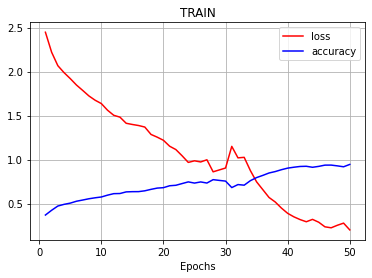

In [39]:
# 시각화
import matplotlib.pyplot as plt

loss2 = h2.history["loss"]
acc2 = h2.history["accuracy"]

xaxis= range(1, 51)

plt.plot(xaxis, loss2, "r", label="loss")
plt.plot(xaxis, acc2, "b", label="accuracy")
plt.legend()
plt.grid()
plt.title("TRAIN")
plt.xlabel("Epochs")
plt.show()

- tanh의 한계로 뒤에 있는 말들이 더 기억이 많이 됨
- Attention : 중간중간 가중치를 계산하고 문맥에 중심단어에 높은 가중치를 부여

In [40]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from attention import Attention

In [42]:
model3 = Sequential()

# 단어를 희소표현에서 밀집표현으로 변경 = 워드 임베딩
model3.add(Embedding(1000, 145))  #  사용된 단어의 갯수(1000), 기사당 단어 수(145)
model3.add(LSTM(100, activation='tanh', return_sequences = True))  # return_sequence : 사용방법에 차이를 주는 매개변수
model3.add(Attention())
model3.add(Dense(46, activation='softmax'))

model3.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

h3 = model3.fit(X_train, y_train, epochs=50)

Epoch 1/50
281/281 [==============================] - 5s 11ms/step - loss: 1.9127 - accuracy: 0.5051
Epoch 2/50
281/281 [==============================] - 3s 10ms/step - loss: 1.3788 - accuracy: 0.6483
Epoch 3/50
281/281 [==============================] - 3s 10ms/step - loss: 1.1209 - accuracy: 0.7179
Epoch 4/50
281/281 [==============================] - 3s 10ms/step - loss: 0.9754 - accuracy: 0.7577
Epoch 5/50
281/281 [==============================] - 3s 10ms/step - loss: 0.8740 - accuracy: 0.7809
Epoch 6/50
281/281 [==============================] - 3s 10ms/step - loss: 0.7775 - accuracy: 0.8061
Epoch 7/50
281/281 [==============================] - 3s 10ms/step - loss: 0.7063 - accuracy: 0.8233
Epoch 8/50
281/281 [==============================] - 3s 10ms/step - loss: 0.6452 - accuracy: 0.8348
Epoch 9/50
281/281 [==============================] - 3s 10ms/step - loss: 0.5934 - accuracy: 0.8498
Epoch 10/50
281/281 [==============================] - 3s 10ms/step - loss: 0.5423 - accura

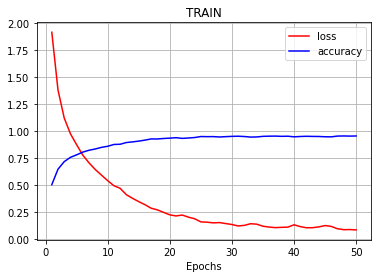

In [43]:
# 시각화
import matplotlib.pyplot as plt

loss3 = h3.history["loss"]
acc3 = h3.history["accuracy"]

xaxis= range(1, 51)

plt.plot(xaxis, loss3, "r", label="loss")
plt.plot(xaxis, acc3, "b", label="accuracy")
plt.legend()
plt.grid()
plt.title("TRAIN")
plt.xlabel("Epochs")
plt.show()

### LSTM + Attention

Epoch 20/50
281/281 [==============================] - 3s 10ms/step - loss: 0.2268 - accuracy: 0.9350

- 텍스트 생성
  - 카카오톡이 어제...  >> 카카오톡이 어제 서버가 터졌어
- 악보 학습
- 시계열 데이터 학습 
  - 시계열 데이터 : 시간의 순서에 따라 흐름이 있음